## Time Series Encoder

In [1]:
# DAL ToolBox
# version 1.01.727

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox")

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




### Series for studying

In [2]:
data(sin_data)
sin_data$y[39] <- sin_data$y[39]*6

In [3]:
sw_size <- 5
ts <- ts_data(sin_data$y, sw_size)
ts_head(ts, 3)

t4        t3        t2        t1        t0       
[1,] 0.0000000 0.2474040 0.4794255 0.6816388 0.8414710
[2,] 0.2474040 0.4794255 0.6816388 0.8414710 0.9489846
[3,] 0.4794255 0.6816388 0.8414710 0.9489846 0.9974950

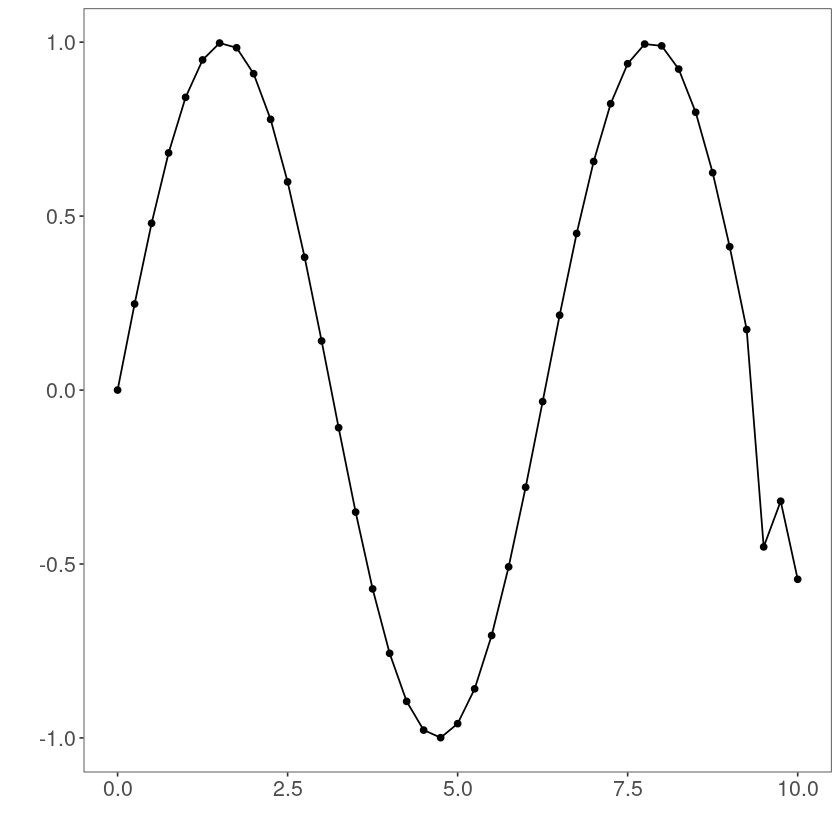

In [4]:
library(ggplot2)
plot_ts(x=sin_data$x, y=sin_data$y) + theme(text = element_text(size=16))

### data sampling

In [5]:
samp <- ts_sample(ts, test_size = 5)
train <- as.data.frame(samp$train)
test <- as.data.frame(samp$test)

### Model training

In [6]:
auto <- autoenc_encode(5, 3)
auto <- fit(auto, train)

### Evaluation of encoding

In [7]:
print(head(train))
result <- transform(auto, train)
print(head(result))


         t4        t3        t2        t1        t0
1 0.0000000 0.2474040 0.4794255 0.6816388 0.8414710
2 0.2474040 0.4794255 0.6816388 0.8414710 0.9489846
3 0.4794255 0.6816388 0.8414710 0.9489846 0.9974950
4 0.6816388 0.8414710 0.9489846 0.9974950 0.9839859
5 0.8414710 0.9489846 0.9974950 0.9839859 0.9092974
6 0.9489846 0.9974950 0.9839859 0.9092974 0.7780732
          [,1]      [,2]      [,3]
[1,] 0.5457159 0.9796322 0.0784511
[2,] 0.8892401 1.2429025 0.3397213
[3,] 1.1930321 1.4134955 0.5438895
[4,] 1.4101778 1.4624996 0.6989693
[5,] 1.5753667 1.4278289 0.7994006
[6,] 1.6764216 1.3125911 0.8422883


### Encoding of test

In [8]:
print(head(test))
result <- transform(auto, test)
print(head(result))


         t4        t3         t2         t1         t0
1 0.9893582 0.9226042  0.7984871  0.6247240  0.4121185
2 0.9226042 0.7984871  0.6247240  0.4121185  0.1738895
3 0.7984871 0.6247240  0.4121185  0.1738895 -0.4509067
4 0.6247240 0.4121185  0.1738895 -0.4509067 -0.3195192
5 0.4121185 0.1738895 -0.4509067 -0.3195192 -0.5440211
          [,1]       [,2]       [,3]
[1,] 1.6709065  0.8759574  0.7800831
[2,] 1.5549159  0.5613264  0.6658404
[3,] 1.4865710 -0.0253603  0.4190091
[4,] 1.0414059 -0.3476920  0.2196742
[5,] 0.9081055 -0.7733836 -0.1162780
